#  Classification

In this exercise, you will learn how to formulate and solve a **classification problem**. A classification problem amounts to finding a good predictor or classifier which maps a given data point via its features to a predicted value of its label (which is the quantity of interest). 

In contrast to **regression problems**, which involve numeric labels (such as an expected delivery time for a meal order), classification problems involve labels which can take on only a finite number of different values. The most simple classification problems are **binary classification problems** where the label can take on only two different values, such as $y=0$ vs. $y=1$, $y=\mbox{``cat''}$ vs. $y=\mbox{``no cat''}$ or $y=\mbox{``red wine''}$ vs. $y=\mbox{``white wine''}$. In classification problems, the label $y$ of a data point indicates to which class (or category) the data point belongs to. 

We will consider two widely used methods for solving classification problems: **logistic regression** and **decision trees**. These two methods differ in the choice of hypothesis space, i.e., the set of predictor functions $h(\mathbf{x})$ that map the features $\mathbf{x}$ of a data point to a predicted label $\hat{y}=h(\mathbf{x})$ (which is hopefully a good approximation of the true label $y$). 

Most of the exercise will consider binary classification problems which involve only two different label values or categories. However, we will also discuss a simple approach for upgrading an arbitrary binary classification method to solve classification problems with more than two label values. We refer to classification problems with more than two label values (or categories) as **multi-class classification problems**. 

## Learning goals

After this round, you should  

- be able to model "real-world" applications as classification problems by identifying features and labels. 
- be able to solve classification problems using logistic regression or decision trees. 
- be able to assess the reliability of classifications provided by logistic regression. 
- know about the differences between decision trees and logistic regression. 
- know how to extend binary classification methods to multi-class problems where labels can take on more than two different values. 


## Relevant Sections in [Course Book](https://arxiv.org/abs/1805.05052)  

Chapter 2, 3.4 and 3.6.

## Additional Material 

* [video-lecture](https://www.youtube.com/watch?v=-la3q9d7AKQ) of Prof. Andrew Ng on classification problems and logistic regression 
* [video-lecture](https://www.youtube.com/watch?v=ZvaELFv5IpM) of Prof. Andrew Ng on extending binary classification methods to multi-class problems 


## The Problem

<img src="box-wine.png" alt="Drawing" style="width: 600px;"/>

Suppose you are a newly minted owner of a wineyard. After filling the wine into bottles they must be labeled according to one of three categories: 

* class 0: [Pinot Noir](https://en.wikipedia.org/wiki/Pinot_noir)
* class 1: [Cabernet Sauvignon](https://en.wikipedia.org/wiki/Cabernet_Sauvignon) 
* class 2: [Merlot](https://en.wikipedia.org/wiki/Merlot)

This labeling typically requires a lot of experience. Sommeliers have such experience but they are expensive. Therefore, you have decided to develop some "sommelier AI" which uses machine learning to automatically classify (label) a given wine-sample.

Technically, the sommelier AI amounts to a predictor (or classifier) map $h(\mathbf{x})$ which delivers a predicted wine label $\hat{y} = h(\mathbf{x})$ based on some features (e.g. chemical properties) $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$ of the particular wine sample. 

To start gentle, we will not directly go for classifying into three categories ("class 0", "class 1" or "class 2"). Instead, we will first try to make the sommelier AI find out if a wine belongs to "class 0" or not (either "class 1" or "class 2"). We will solve this binary classification problem using two basic methods: logistic regression and decision trees. Finally, we will show a simple trick that allows to extend a binary classification method to solve problems with more than $2$ different classes.  

As you might already know most machine learning problems (and methods) consist of three components: 

* some **data** (a bunch of data points, each of which is characterized by features and labels) 
* a **hypothesis space** (consisting of a set of predictor functions from features to labels)
* a **loss function** which is used to assess the quality of a particular predictor function 

We will now work through all these components for our wine labeling problem. 

## The Data

ML methods aim at finding a good predictor map (or classifier) $h(\mathbf{x})$ which takes some features $\mathbf{x}$ as input and outputs a guess (or estimate) for the label $y$ of the data point (which represents a wine sample in our application). To measure the quality of a particular predictor $h(\mathbf{x})$ we try it out on data points for which we know already the true label values $y$. The basic principle of classification methods is then to find (or learn) the best predictor function out of a set of computationally feasible functions (the hypothesis space). 

We have access to a data set consisting of $m$ data points $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ for $i=1,\ldots,m$. The $i$th data point $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ is characterized by several features (such as alcohol concentration) $\mathbf{x}^{(i)}$ and the true label $y^{(i)}$ which has been found out by a human somelier. We will use this **labeled data** to find a good predictor map $h(\mathbf{x})$. In contrast to regression problems, where the ouput $h(\mathbf{x})$ of a predictor map is a (real) number, here the ouput $h(\mathbf{x})$ is a label value or category. In this case it is costumary to use the term **classifier** for the prediction map $h(\mathbf{x})$.

A good classifier $h(\mathbf{x})$ should at least agree well with the sommelier judgment,
\begin{equation} 
\underbrace{y^{(i)}}_{\mbox{label by somelier}} \approx \underbrace{h(\mathbf{x}^{(i)})}_{\mbox{predicted label } \hat{y}^{(i)}}  \mbox{ for all previous samples } i =1,\ldots,m. 
\end{equation}

The data obtained from previous wine tastings is described in [scikit-learn datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) 
and has the following characteristics. 

* It contains $m=178$ wine samples indexed by $i=1,\ldots,m$.  
* The $i$-th wine sample is associated with a class or category $c^{(i)}$ which can be either $0$,$1$ or $2$.
* the $i$-th wine sample is characterized by $n=13$ numerical attributes $x^{(i)}_{1},\ldots,x^{(i)}_{n}$ such as alcohol percentage or the concentration of flavonoids. 

<a id='demoboundary'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Load Wine Data.

The code snippet below loads the wine data set $(\mathbf{x}^{(i)},c^{(i)})$. The $i$-th data point represents a wine sample with features (chemical measurements) stored in the vector $\mathbf{x}^{(i)} \in \mathbb{R}^{n}$ and the wine category $c^{(i)} \in \{0,1,2\}$ as determined by a human somelier. The features and categories for the first five wine samples $i=1,\dots,5$ are displayed. 
</div>

In [3]:
############################# IMPORTANT! #############################
# This cell needs to be run to load the necessary libraries and data #
######################################################################

%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Load the dataset and store data and labels in variables
wine = datasets.load_wine()

X_data = wine['data']
wine_class = wine['target']
categories = wine_class.reshape(-1, 1)

print('data shape\t', X_data.shape, '\nlabels shape \t', categories.shape)
print("Number of samples from Class 0:", sum(wine_class == 0))
print("Number of samples from Class 1:", sum(wine_class == 1))
print("Number of samples from Class 2:", sum(wine_class == 2))

# we can use the Python library "pandas" to show us a preview of the features and labels

features = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
data = features
data['target'] = wine['target']
data['class'] = data['target'].map(lambda ind: wine['target_names'][ind])
print(data.head(5))

data shape	 (178, 13) 
labels shape 	 (178, 1)
Number of samples from Class 0: 59
Number of samples from Class 1: 71
Number of samples from Class 2: 48
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80

### Features and Labels 

Our goal is to classify a wine based on its features (chemical measurements). The $i$-th wine sample is characterized by the features $x^{(i)}_{1},\ldots,x^{(i)}_{13}$ which we collect into the **feature vector** $\mathbf{x}^{(i)} = \big(x_{1}^{(i)},x_{2}^{(i)}, ... x_{13}^{(i)} \big)^{T} \in \mathbb{R}^{13}$. It will be convenient to stack the feature vectors $\mathbf{x}^{(i)} \in \mathbb{R}^{13}$, obtained for all wine samples $i=1,\dots,m$, into the feature matrix 

<a id='xm'></a>
\begin{equation*}
    \mathbf{X} = \big(\mathbf{x}^{(1)},\dots,\mathbf{x}^{(178)}\big)^T=\begin{bmatrix}
    x^{(1)}_{1}  & \dots & x^{(1)}_{13} \\
    \vdots & \ddots & \vdots\\
    x^{(178)}_{1} & \dots & x^{(178)}_{13}
    \end{bmatrix},\ \mathbf{X} \in \mathbb{R}^{m \times n},\ \text{where } m=178, n=13.
    \tag{1}
\end{equation*}

Besides its features $\mathbf{x}^{(i)}$, the $i$-th wine sample in our dataset is characterized by the "correct" or "true" label $y^{(i)}$ which has been determined by a human expert (sommelier). The label is $y^{(i)}=1$ if the $i$-th wine sample is from "Class 0" and $y^{(i)}=0$ otherwise (i.e. it is either from "Class 1" or "Class 2"). It will be convenient to collect the labels of all wine samples into the label vector 

<a id='vy'></a>
\begin{equation*}
    \mathbf{y}=\big(y^{(1)},y^{(2)},\ldots,y^{(m)} \big)^{T} = \begin{bmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots\\
    y^{(m)}
    \end{bmatrix} \in \mathbb{R}^{m}.
    \tag{2}
\end{equation*}

<a id='featurefunction'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Feature Matrix. 

The code snippet below implements a Python function `X=feature_matrix()` which loads the wine dataset and returns the feature matrix ([1](#xm)) of size $178 \times 13$ containing $n=13$ features for each of the $m=178$ wine samples considered in previous wine tastings. The $i$-th row of the feature matrix contains the features $x^{(i)}_{1},\ldots,x^{(i)}_{n}$ of the $i$-th wine sample. 

</div>

In [4]:
def feature_matrix():
    """
    Generate a feature matrix representing the chemical measurements of wine samples in the dataset.

    :return: array-like, shape=(m, n), feature-matrix with n features for each of m wine samples. """
    
     
    wine = datasets.load_wine() # load the dataset into the variable 'wine'
    features = wine['data']     # read out the features of the wine samples and store in variable 'features' 
    n = features.shape[1]       # set n to the number of colums in features 
    m = features.shape[0]       # set m equal to the number of rows in features    

    X = np.zeros((m,n))

    for i in range(m):        
        X[i] = np.array(features[i])
    return X

<a id='labelfunction'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Label Vector. 

The code snippet below implements a Python function `y=labels()` which loads the wine dataset and returns the label vector ([2](#vy)) of length $m$ where `m` is the number of wine samples described in the datset. The $i$th entry $y^{(i)}$ of the returned vector should be $y^{(i)}=1$ if the $i$th wine sample is from Class 0 and $y^{(i)}=0$ otherwise.
    
</div>

In [5]:
def labels():
    """ 
    :return: array-like, shape=(m, 1), label-vector
    """
    wine = datasets.load_wine() # load the dataset into the variable 'wine'
    cat = wine['target']         # read out the categories (0,1 or 2) of wine samples and store in vector 'cat' 
    m = cat.shape[0]       # set m equal to the number of rows in features  
    y = np.zeros((m, 1));    # initialize label vector with zero entries
    
    for i in range(m):
        if (cat[i] == 0):
            y[i,:] = 1 # Class 0
        else:
            y[i,:] = 0 #Not class 0
  
    return y

<a id='demoboundary'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Visualize Data Points.

The code snippet below uses the functions from the previous tasks to load the features $\mathbf{x}^{(i)}$ and labels $y^{(i)}$ of the wine samples. We visualize these data points using a scatter plot. In this scatter plot, the $i$th wine sample is represented by either a dot (when $y^{(i)} =0$) or a cross ($y^{(i)}=1$) located at the coordinates given by the first two features $x_{1}^{(i)}$ and $x_{2}^{(i)}$.  
</div>

Text(0, 0.5, 'feature x2')

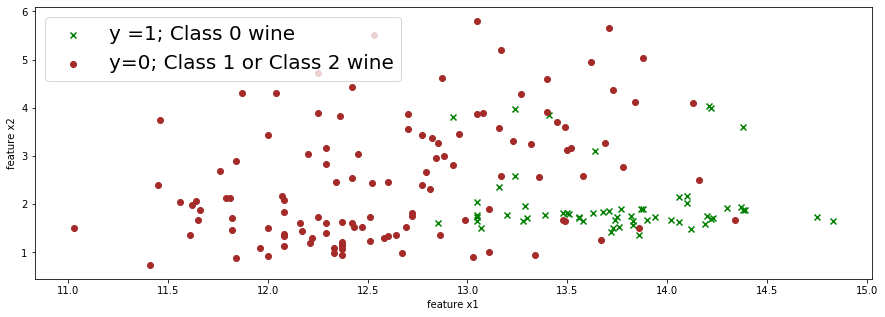

In [6]:
y = labels() 
X = feature_matrix()
indx_1 = np.where(y == 1)[0] # index of each class 0 wine.
indx_2 = np.where(y == 0)[0] # index of each not class 0 wine
plt.rc('legend', fontsize=20) 
fig, axes = plt.subplots(figsize=(15, 5))
axes.scatter(X[indx_1, 0], X[indx_1, 1], c='g', marker ='x', label='y =1; Class 0 wine')
axes.scatter(X[indx_2, 0], X[indx_2, 1], c='brown', marker ='o', label='y=0; Class 1 or Class 2 wine')
axes.legend(loc='upper left')
axes.set_xlabel('feature x1')
axes.set_ylabel('feature x2')

## Logistic Regression
<img src="Log_Reg2.png" alt="Drawing" style="width: 600px;"/>

Our goal is to determine the label $y$ of a wine sample based on its features $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$. The label is $y=1$ if the wine is from class 0 and $y=0$ otherwise (either class 1 or class 2). 

Similar to linear regression, **logistic regression** uses a linear function of the form $h^{(\mathbf{w})}(\mathbf{x})= \mathbf{w}^{T} \mathbf{x}$, with some weight vector $\mathbf{w} \in \mathbb{R}^{n}$, to predict the label $y$ based on the features $\mathbf{x}$. 

At this point it might seem strange to use the real-valued function $h^{(\mathbf{w})}(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ for predicting the binary label $y \in \{0,1\}$. Indeed, while the label $y$ can take on only values $0$ or $1$, the function $h^{(\mathbf{w})}(\mathbf{x})$ can take on any real number. 

However, it turns out to be useful to use the real-valued function $h^{(\mathbf{w})}(\mathbf{x})$ for predicting binary labels. First of all, we can easily obtain a predicted label $\hat{y} \in \{0,1\}$ simply by using the sign of $h^{(\mathbf{w})}(\mathbf{x})$, 
\begin{equation}
\hat{y} = \begin{cases} 1 & \mbox{ for } h^{(\mathbf{w})}(\mathbf{x}) \geq 0 \\ 0 & \mbox{ for } h^{(\mathbf{w})}(\mathbf{x}) < 0. \end{cases}
\end{equation} 
What is more, we can accompany the predicted label by a **measure of the confidence (or reliability)** in the classification $\hat{y}$ using the magnitude $|h^{(\mathbf{w})}(\mathbf{x})|$.

This, rather intuitive but informal, interpretation of the predictor $h^{(\mathbf{w})}(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ can be made mathematically precise by using a **probabilistic model** for the labels of data points. In particular, we could  model the true label $y$ of a wine sample as a **random variable**. In particular, we consider $y$ as a (realization of a) binary random variable taking on the value $y=1$ with probability 
\begin{align} 
{\rm Prob}(y=1; \mathbf{w}) & = \frac{1}{1+{\rm exp}(-h^{(\mathbf{w})}(\mathbf{x}))} = \frac{1}{1+{\rm exp}(-\mathbf{w}^{T}\mathbf{x})}. 
\end{align}
Note that the probability depends on the weight vector $\mathbf{w}$ which has to be determined (learnt) from data.

Since the label $y$ must take on either $1$ or $0$, which implies ${\rm Prob}(y=0;\mathbf{w}) + {\rm Prob}(y=1;\mathbf{w})=1$, we have  
\begin{align} 
{\rm Prob}(y=0; \mathbf{w}) & = 1- \frac{1}{1+{\rm exp}(-\mathbf{w}^{T}\mathbf{x})}  = \frac{1}{1+{\rm exp}(\mathbf{w}^{T}\mathbf{x})}. 
\end{align}

To evaluate the probability ${\rm Prob}(y=1;\mathbf{w})$, we need to specify the weight vector $\mathbf{w}$ and we need to know the feature vector $\mathbf{x}$ of a wine sample. The feature vector $\mathbf{x}$ of a wine sample is available via chemical measurements. The more challenging part is to come up with a good choice for the weight vector $\mathbf{w}$. 

A principled approach to find or **learn** a good choice for the weight vector $\mathbf{w}$ is to maximize the probability (or likelihood) of the labels $y^{(i)}$, $i=1,\ldots,m$, for the wine-samples in our dataset. 
This **maximum likelihood** approach amounts to the following optimization problem  
\begin{equation}
\tag{11}
\widehat{\mathbf{w}} = {\rm argmax} \prod_{i=1}^{m} {\rm Prob}(y = y^{(i)}; \mathbf{w}). 
\label{logloss_ml}
\end{equation} 
The product over all samples $i=1,\ldots,m$ arises from the assumption that the samples are realizations of independent and identically distributed (i.i.d.) random variables. We will not use this proabilistic interpretation in what follows but instead we will show that this maximum likelihood approach is equivalent to the minimization a certain loss function, the **logistic loss**. 

As detailed in the course book (Section 3.4), solving the above maximum likelihood problem is equivalent to minimizing the average **logistic loss**. The logistic loss incurred by a linear predictor $h^{(\mathbf{w})}(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$, using the weight vector $\mathbf{w}$, when applied to a data point with features $\mathbf{x}$ and true label $y$ is defined as:

\begin{equation*}
    \mathcal{L}\big((\mathbf{x},y);\mathbf{w}\big) = -y\log\big(\sigma\big( \mathbf{w}^{T} \mathbf{x} \big)\big)-(1-y)\log\big(1-\sigma\big(\mathbf{w}^{T}\mathbf{x}\big) \big). 
    \label{loss}
    \tag{3}
\end{equation*}
Here, we used the **sigmoid function** 
\begin{equation*}
    \sigma(z)= \frac{1}{1+{\rm exp}(-z)}.
    \label{sigmoid}
    \tag{4}
\end{equation*}
Since we have $m=178$ labeled samples with features $\mathbf{x}^{(i)}$ and labels $y^{(i)}$, for $i=1,\ldots,m$, we can evaluate the logistic loss for all those samples to obtain the average loss or **empirical risk** 
\begin{align}
\mathcal{E}(\mathbf{w}) 
& = (1/m) \sum_{i=1}^{m} \mathcal{L}((\mathbf{x}^{(i)},y^{(i)}),\ h^{(\mathbf{w})}) \nonumber \\ 
&  = (1/m) \sum_{i=1}^{m}\big[ -y^{(i)}\log\big(\sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\log\big(1-\sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big) \big]. 
   \label{erm}
    \tag{5}
\end{align}
The empirical risk $\mathcal{E}(\mathbf{w})$ is a measure for how well a classifier $h^{(\mathbf{w})}=\mathbf{w}^{T} \mathbf{x}$ agrees with the labeled data points $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ for $i=1,\ldots,m$. If the risk $\mathcal{E}(\mathbf{w})$ is small, then the classifier agrees well with the labeled data points. 

Naturally, we should chose the weight vector $\mathbf{w}$ to make $\mathcal{E}(\mathbf{w})$ as small as possible. It turns out that chosing the weight vector in order to minimize the empirical risk is in fact the same as chosing the weight vector via the maximum likelihood estimate $\widehat{\mathbf{w}}$ \eqref{logloss_ml}: 

\begin{align}
\widehat{\mathbf{w}} & = {\rm argmin}_{\mathbf{w} \in \mathbb{R}^{d}} \mathcal{E}(\mathbf{w}) \nonumber \\ 
& = {\rm argmin}_{\mathbf{w} \in \mathbb{R}^{d}} (1/m) \sum_{i=1}^{m} \big[-y^{(i)}\log\big(\sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\log\big(1- \sigma(\mathbf{w}^{T}\mathbf{x}^{(i)})\big)\big]. 
\end{align}


Note that the empirical risk $\mathcal{E}( \mathbf{w})$ is a differentiable convex function of the weight vector $\mathbf{w}$. Such functions can be minimized efficiently using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) (see [course book](https://arxiv.org/pdf/1805.05052.pdf), Chapter 5 for more details). Moreover, the Python library `scikit-learn` provides the class `LogisticRegression()` for linear classifiers that are optimizing using the logistic loss. In particular, the function [`LogisticRegression.fit(X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) minimizes the empirical risk for data points whose features are stored in the numpy array `X` and labels are stored in the numpy array `y`. 

<a id='demoboundary'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Logistic Loss.

The code snippet below plots the logistic loss $\mathcal{L}\big((\mathbf{x},y);\mathbf{w}\big) = -y\log\big(\sigma\big( \mathbf{w}^{T} \mathbf{x} \big)\big)-(1-y)\log\big(1-\sigma\big(\mathbf{w}^{T}\mathbf{x}\big) \big)$ as a function of the predictor value $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$. The value $\mathbf{w}^{T} \mathbf{x}$ is interpreted as the confidence in the true label being equal to $1$. As soon as $\mathbf{w}^{T} \mathbf{x}> 0$ we classify a data point as $\hat{y} = 1$ and the absolute value $|\mathbf{w}^{T} \mathbf{x}|$ quantifies the confidence in this classification result. If the true label is $y=1$ then we would like the loss function to decrease $\mathcal{L}\big((\mathbf{x},y);\mathbf{w}\big)$ as $\mathbf{w}^{T} \mathbf{x}$ increases (towards $+\infty$). Similarly, if the true label of the data point is $y=0$, we would like the loss to decrease $\mathbf{w}^{T} \mathbf{x}$ as $\mathbf{w}^{T} \mathbf{x}$ decreases towards $- \infty$, since we are increasingly confident in the correct classification $\hat{y}=0$. 
</div>

(1000, 1)


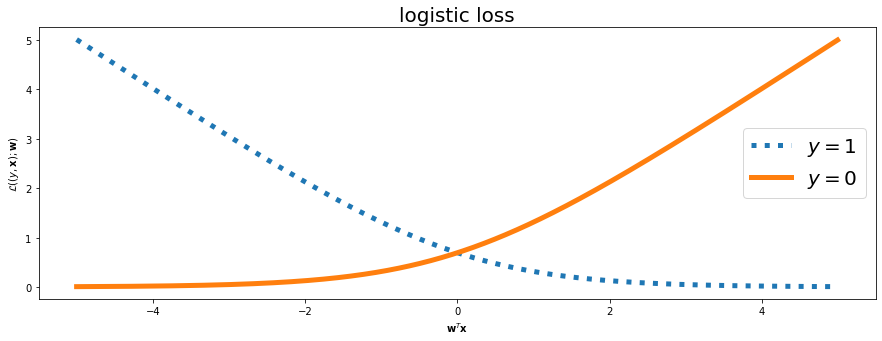

In [7]:
def sigmoid_func(x):
    f_x = 1/(1+np.exp(-x))
    return f_x

fig, axes = plt.subplots(1, 1, figsize=(15, 5)) #used only for testing purpose

range_x = np.arange(-5 , 5 , 0.01).reshape(-1,1)
print(range_x.shape)
logloss_y1 = np.empty(len(range_x))
logloss_y0 = np.empty(len(range_x))
#squaredloss_y1 = np.empty(len(range_x))
#squaredloss_y0 = np.empty(len(range_x))
plt.rc('legend', fontsize=20) 
plt.rc('axes', labelsize=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

for i in range(len(range_x)):
    logloss_y1[i] = -np.log(sigmoid_func(range_x[i]))     # logistic loss when true label y=1
    logloss_y0[i] = -np.log(1-sigmoid_func(range_x[i]))   # logistic loss when true label y=0
     
# plot the results, using the plot function in matplotlib.pyplot.

axes.plot(range_x,logloss_y1, linestyle=':', label=r'$y=1$',linewidth=5.0)
axes.plot(range_x,logloss_y0, label=r'$y=0$',linewidth=5.0)

axes.set_xlabel(r'$\mathbf{w}^{T}\mathbf{x}$')
axes.set_ylabel(r'$\mathcal{L}((y,\mathbf{x});\mathbf{w})$')
axes.set_title("logistic loss",fontsize=20)
axes.legend()

<a id='demoboundary'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Logistic vs. Squared Error Loss.

The code snippet below extends the demo above by adding the squared error loss $(y-\mathbf{w}^{T}\mathbf{x})^{2}$ for the two cases $y=1$ and $y=0$. The values of the loss functions for various values of $\mathbf{w}^{T} \mathbf{x}$ are stored in the numpy arrays `squaredloss_y1` and `squaredloss_y0`. These numpy arrays have the same shape as the numpy array `range_x`. 

</div>

(400, 1)


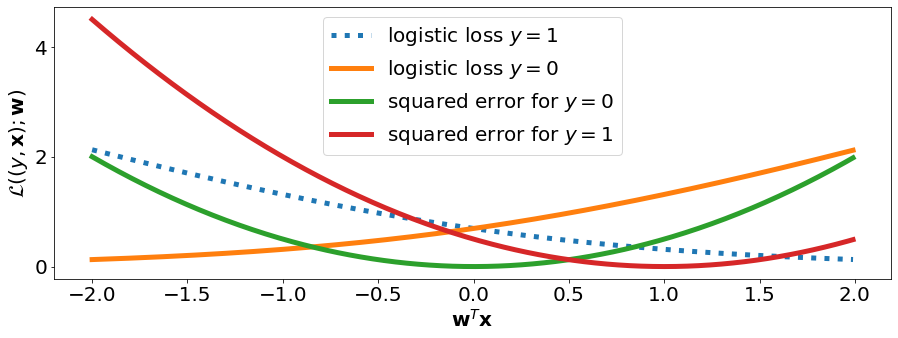

In [8]:
def sigmoid_func(x):
    f_x = 1/(1+np.exp(-x))
    return f_x

fig, axes = plt.subplots(1, 1, figsize=(15, 5))

range_x = np.arange(-2 , 2 , 0.01).reshape(-1,1)
print(range_x.shape)
logloss_y1 = np.empty(len(range_x))
logloss_y0 = np.empty(len(range_x))
squaredloss_y1 = np.empty(len(range_x))
squaredloss_y0 = np.empty(len(range_x))

plt.rc('legend', fontsize=20) 
plt.rc('axes', labelsize=40) 
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 

for i in range(len(range_x)):
    logloss_y1[i] = -np.log(sigmoid_func(range_x[i]))     # logistic loss when true label y=1
    logloss_y0[i] = -np.log(1-sigmoid_func(range_x[i]))   # logistic loss when true label y=0

    squaredloss_y1[i] = (range_x[i]-1)**2 
    squaredloss_y0[i] = (range_x[i]-0)**2 


    
# plot the results, using the plot function in matplotlib.pyplot.

axes.plot(range_x,logloss_y1, linestyle=':', label=r'logistic loss $y=1$',linewidth=5.0)
axes.plot(range_x,logloss_y0, label=r'logistic loss $y=0$',linewidth=5.0)
axes.plot(range_x,squaredloss_y0/2, label=r'squared error for $y=0$',linewidth=5.0)
axes.plot(range_x,squaredloss_y1/2, label=r'squared error for $y=1$',linewidth=5.0)

axes.set_xlabel(r'$\mathbf{w}^{T}\mathbf{x}$')
axes.set_ylabel(r'$\mathcal{L}((y,\mathbf{x});\mathbf{w})$')
axes.legend()

<a id='logisticregression'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Logistic Regression. 

The code snippet below uses the Python function `sklearn.linear_model.LogisticRegression` to:

* Initialize the logistic regression model with `LogisticRegression(random_state=0,C=1e6)`. Refer to [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
* Compute the optimal weight vector $\widehat{\mathbf{w}}$ which minimizes the average logistic loss on the training data $(\mathbf{x}^{(i)},y^{(i)})$ for $i=1,\ldots,m$. You can use the function [`LogisticRegression.fit(X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) which uses as input the feature matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ and the label vector $\mathbf{y}=\big(y^{(1)},\ldots,y^{(m)}\big)^{T}$. [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit)
* Predict labels for the wine data using the function [`predict(X)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) which uses as input the feature matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$. The obtained predicted labels are stored in the numpy array `y_pred` of shape (178,1). Refer to [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict).
    
</div>

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

wine = datasets.load_wine()         # load wine datasets into variable "wine"
X = wine['data']                    # matrix containing the feature vectors of wine samples
cat = wine['target'].reshape(-1, 1) # vector with wine categories (0,1 or 2)

m = cat.shape[0]         # set m equal to the number of rows in features  
y = np.zeros((m, 1));    # initialize label vector with zero entries
    
for i in range(m):
        if (cat[i] == 0):
            y[i,:] = 1 # Class 0
        else:
            y[i,:] = 0 #Not class 0


print(X.shape, y.shape)

# initialize logistic regression
logReg = LogisticRegression(random_state=0, C=1e6)

# Train Logistic Regression Classifier
logReg = logReg.fit(X, y)

#Predict the response for test dataset
y_pred = logReg.predict(X).reshape(-1, 1)




(178, 13) (178, 1)


/Users/alexanderjung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexanderjung/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Decision Boundary of Logistic Regression 

After we have learnt the predictor function, or its weight $\widehat{\mathbf{w}}$, we can classify any new wine sample according to $\hat{y}=1$ if $h(\mathbf{x}) = \widehat{\mathbf{w}}^{T} \mathbf{x} > 0$ and $\hat{y}=0$ otherwise. Thus, our classifier divides all wine-samples into two halfspaces of $\mathbb{R}^{2}$ (since we are only using two features to characterize a wine sample). 

The wine-samples which are classified as $\hat{y} =1$ belong to the halfspace $\{ \mathbf{x}: \hat{\mathbf{w}}^{T} \mathbf{x} > 0 \}$, while all the wine-samples which are classified as $\hat{y} = 0$ belong to the half-space $\{ \mathbf{x}: \hat{\mathbf{w}}^{T} \mathbf{x} < 0 \}$. These two half-spaces are separated by the decision boundary $\{ \mathbf{x}: \hat{\mathbf{w}}^{T} \mathbf{x} =0\}$. 

For most training data, the decision boundary determined by logistic regression will not perfectly separate the training data points according to $y^{(i)}=1$ and $y^{(i)}=0$. Thus, we typically have training samples with the same true label but which are located at oposite sides of the decision boundary. However, the decision boundary will be chosen such that on each side one class dominates. 

The decision boundary provides also a geometric interpretation of the magnitude $|\widehat{\mathbf{w}}^{T} \mathbf{x}|$ as the normal distance of a data point with features $\mathbf{x}$ to the decision boundary. Thus, the larger $|\widehat{\mathbf{w}}^{T} \mathbf{x}|$, the farther away is the data point from the decision boundary and, in turn, the more reliable is the predicted label $\hat{y}$ for this data point. On the other hand, if $|\widehat{\mathbf{w}}^{T} \mathbf{x}| \approx 0$, then the data point with features $\mathbf{x}$ is close to the decision boundary, i.e., it is a border case which cannot be classified reliably. 

<a id='demoboundary'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Linear Decision Boundary.

The code snippet below learns a linear predictor function $h(\mathbf{x}) =\widehat{\mathbf{w}}^{T} \mathbf{x}$ using logistic regression using only the first two features $x_{1}$ and $x_{2}$ of a wine sample. It then creates a scatter plot of the wine samples $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ for $i=1,\ldots,m$. All samples with $y^{(i)} = 1$ are indicated by "x" while all samples with true label $y^{(i)} =0$ are indicated by "o". The scatter plot also indicates the decision boundary $\{\mathbf{x}: \widehat{\mathbf{w}}^{T} \mathbf{x}=0 \}$. 

Note that the training data is not perfectly separable by a linear decision boundary. In other words, there is no straight line such that on each side of the line are only data points with the same label.  

</div>

Accuracy: 85.96 %
Distance from point [ 14.83 , [1.64] ] to decision boundary is: [1.51554299]
Distance from point [ 11.03 , [1.51] ] to decision boundary is: [2.09402068]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


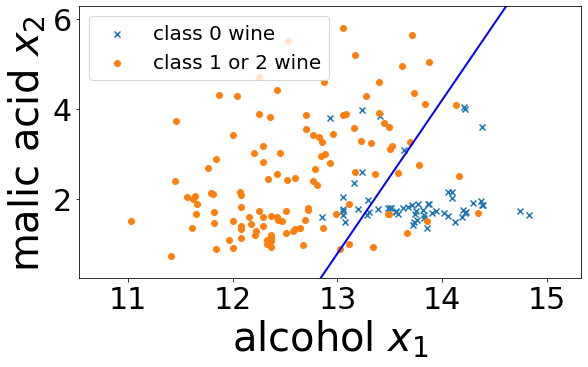

In [9]:
from sklearn.linear_model import LogisticRegression
from numpy.linalg import norm

wine = datasets.load_wine()         # load wine datasets into variable "wine"
X = wine['data'][:, :2]             # matrix containing the feature vectors of first 2 features of wine samples
c = wine['target'].reshape(-1, 1) # vector contaiing the true categories as determined by human someliers

m = c.shape[0]         # set m equal to the number of rows in features  
y = np.zeros((m,1));    # initialize label vector with zero entries
    
for i in range(m):
        if (c[i] == 0):
            y[i] = 1 # Class 0
        else:
            y[i] = 0 #Not class 0


# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e6, random_state=0)
logreg.fit(X, y)
weight = logreg.coef_ 
weight = weight.reshape(-1,1)
y_pred = logreg.predict(X)
accuracy = metrics.accuracy_score(y, y_pred)

print("Accuracy:", round(100*accuracy, 2), '%')

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,0]

Z = Z.reshape(xx.shape)
x1 = xx[:,np.argmax(Z==1)][0]
x2 = xx[:,np.argmax(Z[-1]==1)][0]

xgrid = np.linspace(x_min, x_max, 100)
y_boundary = (-1/weight[1])*(xgrid*weight[0] + logreg.intercept_)

# Pick out two particular data points which are either near or far away from the
# boundary and indicate the normal distance to the decision boundary of these two data points.
p1 = np.asarray([xgrid.min(), y_boundary.min()])
p2 = np.asarray([xgrid.max(), y_boundary.max()])
p3 = np.asarray([X[:, 0].max(), X[:, 1][np.where(X == X[:, 0].max())[0]]])
p4 = np.asarray([X[:, 0].min(), X[:, 1][np.where(X == X[:, 0].min())[0]]])
d = norm(np.cross(p2-p1, p1-p3))/norm(p2-p1)
d2 = norm(np.cross(p2-p1, p1-p4))/norm(p2-p1)
print("Distance from point", "[", p3[0],",", p3[1] ,"]", "to decision boundary is:", d)
print("Distance from point", "[", p4[0],",", p4[1] ,"]", "to decision boundary is:", d2)

plt.figure(1, figsize=(9, 5))
#plt.contourf(xx, yy, Z, levels=np.linspace(0,1,100))
#plt.colorbar(label=r'$\sigma(\mathbf{w}^{T} \mathbf{x})$')
# plt.plot([x1, x2], [y_min, y_max], color='red')

indx_1 = np.where(y == 1)[0] # index of each class 0 wine.
indx_2 = np.where(y == 0)[0] # index of each not class 0 wine
plt.scatter(X[indx_1, 0], X[indx_1, 1],marker='x',label='class 0 wine')
plt.scatter(X[indx_2, 0], X[indx_2, 1],marker='o',label='class 1 or 2 wine')
plt.xlabel(r'alcohol $x_{1}$')
plt.ylabel(r'malic acid $x_{2}$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.plot(xgrid, y_boundary, color='blue', linewidth=2.0)
plt.xticks()
plt.yticks()
plt.legend()
plt.show()

### Accuracy - How well did we do?
After we have computed the optimal weight $\widehat{\mathbf{w}}$ using logistic regression, we can calculate the accuracy of the resulting classifier as the fraction of correctly labeled wine samples (for which $y^{(i)} = \hat{y}^{(i)}$):

\begin{equation*}
    \text{Accuracy} =\dfrac{1}{m} \sum_{i=1}^{m} \mathcal{I}(\hat{y}^{(i)} = y^{(i)})
    \label{acc}
    \tag{8}
\end{equation*}

Here $\mathcal{I}(\hat{y}^{(i)} = y^{(i)})$ denotes the indicator function which is equal to one if $\hat{y}^{(i)} = y^{(i)}$ and equal to zero otherwise. 

<a id='logregaccuracy'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Compute Accuracy. 
 
The code snippet below implements a Python function `acc=calculate_accuracy(y, y_hat)` according to (Eq. \ref{acc}) which takes as inputs a vector $\mathbf{y}=\big(y^{(1)},\ldots,y^{(m)}\big)^{T}$ of true labels and another vector $\mathbf{\hat{y}}=\big(\hat{y}^{(1)},\ldots,\hat{y}^{(m)}\big)^{T}$ containing predicted labels.
The function returns the accuracy as percentage. Thus, if all samples are classified correctly, the returned value is $100$. 
</div>

In [10]:
def calculate_accuracy(y, y_hat):
    """
    Calculate accuracy of your prediction
    
    :param y: array-like, shape=(m, 1), correct label vector
    :param y_hat: array-like, shape=(m, 1), label-vector prediction
    
    :return: scalar-like, percentual accuracy of your prediction
    """
  
    m = y.shape[0];
    correct = 0;
    for i in range(m):
        if (y[i]==y_hat[i]):
            correct += 1
    accuracy = round(correct/m, 4)*100
 
    return accuracy

In the next cell we execute the implemented function and test that it works properly.

## Multiclass Classification

So far, we have considered the problem of classifying a wine sample as $y=1$ if it belongs to "class 0" and as $y=0$ if not, i.e., if it belongs to "class 1" or "class 2". We have solved this binary classification problem using logistic regression. However, our ultimate goal is to classify a wine sample according to all three categories of wine. 

There is a simple but useful trick for **upgrading** any binary classification method to handle more than two different label values or classes. The idea behind this trick which is known as **one vs. rest** is quite simple: just split the multiclass classification problem into several subproblems, each subproblem being one binary classification problem. We then apply a binary classification method (such as logistic regression) to each of the subproblems and combine their results to obtain a predicted label for the multiclass problem. 

For the wine classification problem, using the three classes "0", "1" or "2", we obtain the following binary classification subproblems: 

- subproblem 0: classify samples into "Class 0" $(y=1)$ vs. "not Class 0" $(y=0)$  
- subproblem 1: classify samples into "Class 1" $(y=1)$ vs. "not Class 1" $(y=0)$  
- subproblem 2: classify samples into "Class 2" $(y=1)$ vs. "not Class 2" $(y=0)$

Each subproblem amounts to testing if the wine belongs to a particular class or not. The $k$th subproblem can be solved using logistic regression yielding a predictor $h^{(\mathbf{w}_{k})}(\mathbf{x})= (\mathbf{w}_{k})^{T} \mathbf{x}$. The predictor $h^{(\mathbf{w}_{k})}(\mathbf{x})= (\mathbf{w}_{k})^{T} \mathbf{x}$ indicates how likely the wine sample belongs to the class $k$. We then assign the wine sample to those class $k$ for which $h^{(\mathbf{w}_{k})}(\mathbf{x})$ is largest. 

### Example

Assume we want to classify a new sample. We generate a feature vector $\mathbf{x}=(x_{1},x_{2},...,x_{13})^{T}$ and use our predictor three times, yielding the following prediction values: 

* subproblem 0: $h^{(\mathbf{w}_{0})}(\mathbf{x}) = 0.1$ ("Class 0 vs. not Class 0")
* subproblem 1: $h^{(\mathbf{w}_{1})}(\mathbf{x}) = 0.4$ ("Class 1 vs. not Class 1") 
* subproblem 2: $h^{(\mathbf{w}_{2})}(\mathbf{x}) = 0.8$ ("Class 2 vs. not Class 2")

From these results, we can see that the predictor $h^{(\mathbf{w}^{(\rm Class 2)})}(x)$ for subproblem 3 (`Class 2` vs. `not Class 2`) yields the highest confidence. Hence, we classify this sample as `Class 2`. 

<img src="Regression_Wine.png" alt="Drawing" style="width: 400px;"/>

<a id='demoboundary'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Multiclass Classification.

The code snippet below illustrates how multiclass classification via logistic regression can be implemented using the `scikit-learn` Python library ([click here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

</div>



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

wine = datasets.load_wine()         # load wine datasets into variable "wine"
X = wine['data']                    # matrix containing the feature vectors of wine samples
y = wine['target'].reshape(-1, 1)   # vector with wine categories (0,1 or 2)

logReg = LogisticRegression(random_state=0,multi_class="ovr") # set multi_class to one versus rest ('ovr')

logReg = logReg.fit(X, y)

y_pred = logReg.predict(X).reshape(-1, 1)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Confusion Matrix

Computing the accuracy, as the fraction of correctly classified wine samples where $\hat{y}^{(i)}=y^{(i)}$, is only one way to check how well you did. In some applications the accuracy is not too much useful as a quality measure. In particular, for applications where the different classes occur with significantly different probabilities ("imbalanced data"). A more fine-grained assessment of a classification method is provided by computing the confusion matrix. The confusion matrix considers the perfomance of a classifier individually for each possible value of the true label. In contrast, the accuracy is an average measure that averages over all possible label values. 

<a id='logregconf'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Confusion Matrix. 

The code snippet below implements a function `visualize_cm(cm)` which takes as input a confusion matrix (`cm`). The entry in the $i$th row and $j$th colums of the confusion matrix is the number of wine samples that have true label $y=i$ but are classified as $\hat{y}=j$.   

You can read more about the confusion matrix and why it is useful at: https://en.wikipedia.org/wiki/Confusion_matrix
</div> 

In [12]:
# This function is used to plot the confusion matrix and normalized confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
def visualize_cm(cm):
    """
    Function visualizes a confusion matrix with and without normalization
    """
    plt.rc('legend', fontsize=10) 
    plt.rc('axes', labelsize=10) 
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 


    fig, axes = plt.subplots(1, 2,figsize=(10,5))

    im1 = axes[0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    fig.colorbar(im1, ax=axes[0])
    classes = ['Class 0','Class 1','Class 2']
    tick_marks = np.arange(len(classes))
    axes[0].set_xticks(tick_marks)
    axes[0].set_xticklabels(classes,rotation=45)
    axes[0].set_yticks(tick_marks)
    axes[0].set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        axes[0].text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    axes[0].set_xlabel('predicted label $\hat{y}$')
    axes[0].set_ylabel('true label $y$')
    axes[0].set_title(r'$\bf{Figure\ 6.}$Without normalization')
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    im2 = axes[1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    fig.colorbar(im2, ax=axes[1])
    
    axes[1].set_xticks(tick_marks)
    axes[1].set_xticklabels(classes,rotation=45)
    axes[1].set_yticks(tick_marks)
    axes[1].set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        axes[1].text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                verticalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    axes[1].set_xlabel('predicted label $\hat{y}$')
    axes[1].set_ylabel('true label $y$')
    axes[1].set_title(r'$\bf{Figure\ 7.}$Normalized')
    
    axes[0].set_ylim(-0.5,2.5) 
    axes[1].set_ylim(-0.5,2.5)
    
    plt.tight_layout()
    plt.show()


<a id='logregconf'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Confusion Matrix. 

The code snippet below computes a confusion matrix using the built in sklearn function `confusion_matrix(y_test, y_pred)` with inputs `y` and `y_pred` which are obtained from the above demo "Multiclass Classification".

[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).
</div> 

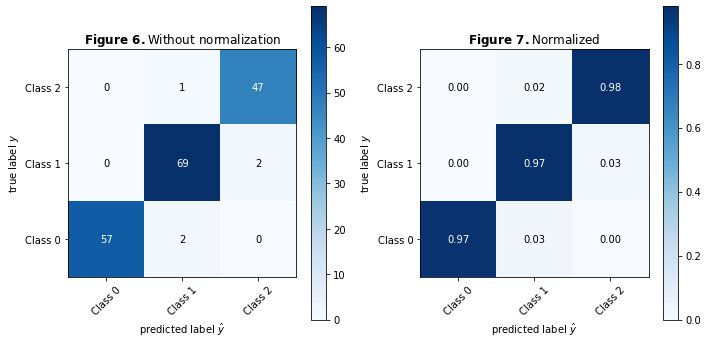

In [13]:
# Get the confusion matrix from the test set and your predictions
from sklearn.metrics import confusion_matrix


cm = metrics.confusion_matrix(y, y_pred)   # determine the confusion matrix 

visualize_cm(cm)      # display the confusion matrix 

## Confidence in Classifications

The regulation on produced wine is quite strict, and if you mis-label too many wines (i.e., the predicted label $\hat{y}$ obtained by some classification method is different from the true label $y$) you might get a painful fine. We now show how to use logistic regression to get a measure of reliability of the predicted label $\hat{y}$. 

In particular, given a wine sample with features $\mathbf{x}$, logistic regression computes the predicted label $\hat{y}$ using the sign of $h^{(\mathbf{w})}(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$. Moreover, can use the magnitude of $h^{(\mathbf{w})}=\mathbf{w}^{T} \mathbf{x}$ as a measure for the reliability of the classification. If this value is too small, we conclude that logistic regression was not able to reliably classify the wine sample and we should send it to a sommelier for a more rigorous analysis. 

In what follows, we will apply a Python library function `logReg.predict_proba(X)` to compute a confidence measure for the resulting classification $\hat{y}$. Instead of using the magnitude of $h^{(\mathbf{w})}=\mathbf{w}^{T} \mathbf{x}$, they use a related but different measure for the reliability. In particular, for a binary classification problem, this method computes the (estimated) probability ${\rm Prob}(y=1; \mathbf{w})= \frac{1}{1+{\rm exp}(-\mathbf{w}^{T}\mathbf{x})}$ that the true label is $1$. 

<a id='logregprobs'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Confidence in Classifications. 

Remember that logistic regression computes an optimal weight vector $\widehat{\mathbf{w}}$ for a linear predictor funtion $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ in order to minimize the average logistic loss incurred over some given labeled data points $(\mathbf{x}^{(i)},y^{(i)})$, $i=1,\ldots,m$, for which we already know the true labels $y^{(i)}$. 

One of the appealing properties of logistic regression is that it not only provides a tool for classifiying data points, i.e., computing a predicted label $\hat{y}$, but also allows to quantify the reliablity of (or confidence in) the predicted label $\hat{y}$. 

Logistic regression uses a probabilistic model that allows to compute the (estimated) probabilities ${\rm Prob}(y=c|\widehat{\mathbf{w}})$ that the true label $y$ takes on a particular value $c$, e.g., $c=0,1,2$ in the wine labelling application. Given a wine sample with features $\mathbf{x}$, we choose the predicted label $\hat{y}$ as the particular value $c \in \{0,1,2\}$ which yields the maximum probability ${\rm Prob}(y=c|\widehat{\mathbf{w}})$. However, if this maximum probability ${\rm Prob}(y=\widehat{y}|\widehat{\mathbf{w}})$ is close to $1/2$ then the classification should be considered highly unreliable. 
 
The code snippet below uses the Python function `logReg.predict_proba(X)`, which reads in the feature matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ whose rows contain the feature vectors $\mathbf{x}^{(i)}$ of the wine samples. For each wine sample $\mathbf{x}^{(i)}$, this function computes the probabilities ${\rm Prob}(y^{(i)}=c|\widehat{\mathbf{w}})$ of the true label $y^{(i)}$ is equal to the value $c=\{0,1,2\}$.

The Python function `logReg.predict_proba(X)` returns a numpy array of shape (m,3) which represents a matrix 
$\mathbf{T} \in \mathbb{R}^{m \times 3}$. The $i$th row of $\mathbf{T}$ represents the probabities ${\rm Prob}(y^{(i)}=0|\widehat{\mathbf{w}})$, ${\rm Prob}(y^{(i)}=1|\widehat{\mathbf{w}})$ and ${\rm Prob}(y^{(i)}=2|\widehat{\mathbf{w}})$. The predicted label $\hat{y}$ is obtained by the maximum of these probabilities, i.e., 
$$ {\rm Prob}(y^{(i)}= \hat{y}^{(i)}|\widehat{\mathbf{w}}) = \max_{c\in \{0,1,2\}} {\rm Prob}(y^{(i)}= c|\widehat{\mathbf{w}}).$$
The confidence in the predicted label being correct is measured by the maximum probabilty $\max_{c\in \{0,1,2\}} {\rm Prob}(y^{(i)}= c|\widehat{\mathbf{w}})$. 

We count the wine samples which have a confidence of less than 90%. E.g., if for a wine sample the class are "class 0": 89%, "class 1": 6% and "class 2": 5%, then the sample is discarded since we are not confident enough in the classification (which would be $\hat{y}=0$ in this case). We store the total number of discarded wine samples in the variable `n_of_discarded_samples`. 


Hint: For more information, we refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba).
</div>

In [14]:
# make a prediction
# y_probs = ...
### BEGIN SOLUTION
y_probs = logReg.predict_proba(X)
### END SOLUTION

# show the inputs and predicted probabilities
print('first five samples and their probabilities of belonging to classes 0, 1 and 2:')
for i in range(5):
    print("Probabilities of Sample", i+1,':', 'Class 0:',"{:.2f}".format(100*y_probs[i][0],2),'%', 'Class 1:', "{:.2f}".format(100*y_probs[i][1]), '%', 'Class 2:', "{:.2f}".format(100*y_probs[i][2]),'%' )

n_of_discarded_samples = 0

### BEGIN SOLUTION

for i in range(len(y_probs)):
    if(np.max(y_probs[i]) < 0.9):
        n_of_discarded_samples += 1
### END SOLUTION
print('Number of discarded samples:', n_of_discarded_samples)

first five samples and their probabilities of belonging to classes 0, 1 and 2:
Probabilities of Sample 1 : Class 0: 99.51 % Class 1: 0.44 % Class 2: 0.05 %
Probabilities of Sample 2 : Class 0: 99.67 % Class 1: 0.28 % Class 2: 0.05 %
Probabilities of Sample 3 : Class 0: 99.83 % Class 1: 0.04 % Class 2: 0.14 %
Probabilities of Sample 4 : Class 0: 99.72 % Class 1: 0.00 % Class 2: 0.28 %
Probabilities of Sample 5 : Class 0: 25.87 % Class 1: 73.33 % Class 2: 0.80 %
Number of discarded samples: 31


## Decision Trees

We will learn another classification method which is referred to as **decision trees**. A decision tree is a flowchart-like representation of a predictor function $h(\mathbf{x})$ that reads in the features $\mathbf{x}$ of a data point and ouputs a predicted label $\hat{y}=h(\mathbf{x})$. The decision tree consists of **nodes** which represent certain tests, e.g., "is the first feature $x_{1}$ larger than 10?". The nodes are connected by **branches** that correspond to the result or outcome of a test (there is one outgoing branch for each possible answer of a test node). By following the branches, we end up at a leaf node (which has no further branches). Each leaf node is associated with a certain output value $h(\mathbf{x})$. The picture below depicts a decision tree with test nodes colored blue and leaf nodes colored orange and green. 

<img src="Decision_Tree.png" alt="Drawing" style="width: 400px;"/>

Now you might wonder how do we choose the test nodes? The basic idea is the same as in linear or logistic regression, we try out many different decision trees (using different choices of test nodes) and pick the one which results in the smallest average loss incurred on some labeled training data points $(\mathbf{x}^{(i)},y^{(i)})$. However, in contrast to logistic regression, this learning or optimization problem involves searching over a discrete set of different configurations of test nodes instead of a continuous convex optimization of a weight vector $\mathbf{w}$. This makes learning decision trees compupationally more challenging compared to logistic regression which allows to use efficient convex optimization methods (such as plain gradient descent). However, there have been developed clever ways to learn good decision trees with a reasonable amout of computational resources.  

If you want to learn more details about decision trees, beyond the requirements of this course, we refer you to: 

- https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
- https://en.wikipedia.org/wiki/Decision_tree_learning#Information_gain
- https://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html

<a id='demotreeboundary'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Decision Boundary of a Decision Tree.

The code snippet below learns a predictor function $h(\mathbf{x})$ using decision trees based on the first two features $x_{1}$ and $x_{2}$ of the wine samples. It then creates a scatter plot of the training samples $(\mathbf{x}^{(i)},y^{(i)}$. All samples with $y^{(i)} = 1$ are indicated by "x" while all samples with true label $y^{(i)} =0$ are indicated by "o". The scatter plot also indicates the decision boundary $\{\mathbf{x}: \widehat{\mathbf{w}}^{T} \mathbf{x}=0 \}$. 

Note that the training data is not perfectly separable by a linear decision boundary. 

</div>

Accuracy: 100.0 %


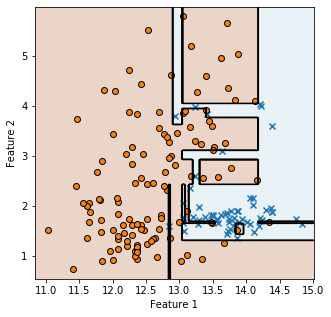

In [15]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    indx_1 = np.where(Y == 1)[0] # index of each class 0 wine.
    indx_2 = np.where(Y == 0)[0] # index of each not class 0 wine
    

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[indx_1, 0], X[indx_1, 1],marker='x',label='class 0', edgecolors='k')
    plt.scatter(X[indx_2, 0], X[indx_2, 1],marker='o',label='class 1', edgecolors='k')
    plt.xlabel(r'Feature 1')
    plt.ylabel(r'Feature 2')

    
wine = datasets.load_wine()         # load wine datasets into variable "wine"
X = wine['data'][:, :2]             # matrix containing the feature vectors of first 2 features of wine samples
c = wine['target']                  # vector contaiing the true categories as determined by human someliers

m = cat.shape[0]         # set m equal to the number of rows in features  
y = np.zeros((m,1));    # initialize label vector with zero entries
    
for i in range(m):
        if (c[i] == 0):
            y[i] = 1 # Class 0
        else:
            y[i] = 0 #Not class 0


tree = DecisionTreeClassifier()   # define object "tree" which represents a decision tree
tree.fit(X, y)                    # learn a decision tree that fits well the labeled wine samples  
y_pred = tree.predict(X)          # compute the predicted labels for the wine samples
accuracy = metrics.accuracy_score(y, y_pred)  # compute the rate of correctly classified wine samples
print("Accuracy:", round(100*accuracy, 2), '%')

plot_decision_boundary(tree, X, y)
plt.show()


<a id='dtclassifier'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Decision Tree Classifier.
    
The code snippet below constructs a decision tree classifier using the class `DecisionTreeClassifier` imported in the previous cell. We use the following parameters for the classifier: `DecisionTreeClassifier(random_state=0, criterion='entropy')`. The argument `criterion` corresponds to a particular choice for the loss function to be used. For background information consult the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

We choose or learn a good decision tree using the [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) function. Using the learnt decision tree, we compute the predicted labels $\hat{y}^{(i)}$ for the training data using the function [`DecisionTreeClassifier.predict`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) and save it to numpy array `y_pred`.
</div>

In [16]:
# Load libraries
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix 

#load data to feature matrix X and label vector y 
wine = datasets.load_wine()
X = wine['data']
y = wine['target'].reshape(-1,1)
feature_cols = wine['feature_names'] # needed for visualization

# Create Decision Tree classifer object with parameters: random_state=0, criterion='entropy'
clf = DecisionTreeClassifier(random_state=0, criterion='entropy')

# Train Decision Tree Classifier
clf_fit = clf.fit(X, y)

#Predict the response for test dataset
y_pred = clf_fit.predict(X)

# Use the metrics.accuracy_score function to calculate accuracy.
accuracy = metrics.accuracy_score(y, y_pred)


# reshape y_pred to 2d matrix
y_pred = y_pred.reshape(-1, 1)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(100*accuracy, 2), '%')

Accuracy: 100.0 %


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<a id='dtcm'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Confusion Matrix.

The code snippet below uses the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate the confusion matrix for the true labels `y` and predicted label `y_pred` obtained from the previous demo. The entries of the resulting confusion matrix are stored in the numpy array `cm`.
</div>

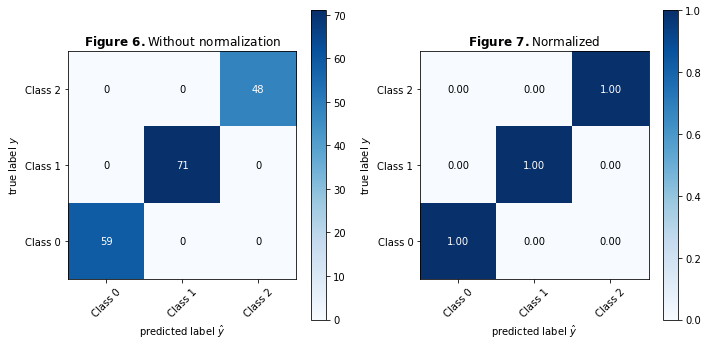

In [17]:
# compute the confusion matrix 
cm = confusion_matrix(y, y_pred) 

# visualizing a confusion matrix
visualize_cm(cm)

In [18]:
# Tests
assert cm.shape == (3,3), "Confusion Matrix has wrong dimensions."
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
r_cm = confusion_matrix(y, y_pred) 
np.testing.assert_allclose(r_cm, cm, atol=1)
### END HIDDEN TESTS

Sanity check tests passed!


<a id='dtvis'></a>
    <div class=" alert alert-info">
<b>Demo.</b> Visualizing the decision tree. 
- Run the below cell to visualize the decision tree.
</div>

In [19]:
# visualize the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Difference between logistic regression and decision trees

The two classification methods logistic regression and decision trees both aim at learning a good predictor $h(\mathbf{x})$ which allows determining the label $y$ of the data point based on some features $\mathbf{x}$. These two classification methods differ in the form of predictor function $h(\mathbf{x})$ they are using. Logistic regression uses linear predictor functions $h(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ (which are thresholded to get discrete label predictions $\hat{y}$). 

In contrast to linear functions used in logistic regression, decision trees use predictor functions that are obtained from flow charts (decision trees) consisting of various tests on the features $\mathbf{x}$. Using sufficiently large decision trees allows to represent highly non-linear functions $h(\mathbf{x})$. In particular, decision trees can perfectly separate data points (according to their labels) which cannot be separated by any straight line (which are the only possible decision boundaries for logistic regression). 

<table><tr>
    <td><img src='lr1.png' style="width: 300px;"></td>
    <td><img src='tree1.png' style="width: 300px;"></td>
</tr></table>